In [0]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels


Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-73gi3efx
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-73gi3efx
  Stored in directory: /tmp/pip-ephem-wheel-cache-s0h93vhp/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


In [0]:
import statsmodels.api as sm

In [0]:
!pip install PyDrive

     |████████████████████████████████| 993kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1lGtCEM-xnHGdjam4JKgzEzgHtXjWQB_1'})
download.GetContentFile('Data.zip')


In [0]:
!unzip Data.zip

Archive:  Data.zip
  inflating: ECE219_tweet_data/tweets_#gohawks.txt  
  inflating: ECE219_tweet_data/tweets_#gopatriots.txt  
  inflating: ECE219_tweet_data/tweets_#nfl.txt  
  inflating: ECE219_tweet_data/tweets_#patriots.txt  
  inflating: ECE219_tweet_data/tweets_#sb49.txt  
  inflating: ECE219_tweet_data/tweets_#superbowl.txt  


In [0]:
import pandas as pd
import json


In [4]:
Total_tweet=0
tweet_time=[]
follow_count=[]
retweet_count=[]

status_count=[]
hashtag_count=[]
friends_count=[]
mentions_TF=[]
favourites_count=[]
url_ratio_count=[]


with open('./ECE219_tweet_data/tweets_#sb49.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count.append(json_object['metrics']['citations']['total'])
    tweet_time.append(datetime_object)
    
    ### new features:
    status_count.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF.append(0)
    else:
      mentions_TF.append(1)

    url_ratio_count.append(len(json_object['tweet']['entities']['urls']))
    favourites_count.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

True

In [5]:
print(len(status_count))
print(len(retweet_count))
print(len(friends_count))
# print(len(mentions_count))


print((status_count[0:100]))
print(hashtag_count[0:100])
print(friends_count[0:100])
print(mentions_TF[0:100])
print(favourites_count[0:100])

print(url_ratio_count[0:100])
print(len(url_ratio_count))


743649
743649
743649
[453, 44, 1976, 44039, 4455, 1477, 6540, 9651, 4194, 4761, 9243, 4541, 1307, 1578, 1579, 1580, 1581, 1582, 1583, 1585, 1587, 1588, 1589, 1591, 1594, 1596, 1597, 1598, 1599, 1602, 1603, 1604, 1605, 1607, 1608, 1609, 1610, 1612, 1613, 1614, 1618, 8692, 1620, 1621, 1624, 1624, 1627, 1629, 1630, 1630, 1632, 1633, 1634, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1648, 1649, 1650, 1650, 1652, 1654, 1657, 1310, 2346, 1658, 1659, 1660, 1661, 1662, 1663, 1665, 1666, 1668, 1669, 1670, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1683, 1685, 1686, 1687, 1688]
[5, 3, 4, 2, 3, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[185, 18, 295, 140, 982, 395, 191, 1357, 5459, 95, 1009, 783, 851, 38, 38, 38, 

In [6]:
import pytz
import numpy as np
from datetime import timedelta



sortTime= np.sort(tweet_time, axis=0)


mint=datetime.datetime.fromtimestamp(sortTime[0])
maxt=datetime.datetime.fromtimestamp(sortTime[-1])
timerange=maxt-mint
print("True range in hour: ",timerange.total_seconds()/(60*60))
total_time_range= timerange.total_seconds()/(60*60)
print("Average number of tweets per hour", len(tweet_time)/total_time_range)







pst_tz = pytz.timezone('America/Los_Angeles')

min_tweet_time= np.min(tweet_time)



minute_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).minute
second_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).second

timeD=timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min)
# print(timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min))
# print(datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD)

min_time_conv=datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD
# print(min_time_conv)

tweet_window=[]
for element in tweet_time:
  element_conv= datetime.datetime.fromtimestamp(element, pst_tz)
  
  bin_index=(element_conv-min_time_conv).total_seconds()/(60*60)
#   print(element_conv,datetime.datetime.fromtimestamp(sortTime[0]))
#   print(int(bin_index))
  tweet_window.append(int(bin_index))
  
  
# print(np.max(tweet_window))
# print((tweet_window))
# np.where(np.asarray(tweet_window,dtype=int)==0)
retweet_array_window=[]
for i in range(np.max(tweet_window)+1):
#   print(np.where(np.asarray(tweet_window,dtype=int)==i))
  retweet_array_window.append(np.where(np.asarray(tweet_window,dtype=int)==i))
#   break

True range in hour:  582.4058333333334
Average number of tweets per hour 1276.8570598680474


In [7]:
# print(retweet_array_window[0][0][0])
# print(retweet_array_window)
my_retweet_count=[]
my_follow_count=[]
my_max_follower_count=[]
my_time_of_day=[]

my_status_count=[] #get how many status in certain hour
my_hashtag_count=[] #get how many hashtags in certain hour
my_friends_count=[] #max friend count
my_mentions_TF=[] #
my_favourites_count=[]
num_tweet=[]
for element in retweet_array_window:
  for innerelement in element:
#     print(innerelement)[]
    item=0
    item1=0
    maxitem2=0
    timeitem=0
    
    item_status=0
    item_hashtag=0
    item_friends=0
    item_mentions=0
    item_favourites=0
    item_tweet=0
    for indexlayer in innerelement:
      
      item_tweet+=1
      item=retweet_count[indexlayer]+item
      item1=follow_count[indexlayer]+item1
      timeitem=datetime.datetime.fromtimestamp(tweet_time[indexlayer], pst_tz).hour
      
      item_status= status_count[indexlayer]+ item_status
      item_hashtag=hashtag_count[indexlayer]+ item_hashtag
      item_friends=item_friends+ friends_count[indexlayer]
      item_mentions=item_mentions+ mentions_TF[indexlayer]
      item_favourites=item_favourites+ favourites_count[indexlayer]
      
      
      
      
      if maxitem2 < follow_count[indexlayer]:
        maxitem2= follow_count[indexlayer]
    my_time_of_day.append(timeitem)   
    my_max_follower_count.append(maxitem2)  
    my_retweet_count.append(item)
    my_follow_count.append(item1)
    
    my_status_count.append(item_status)
    my_hashtag_count.append(item_hashtag)
    my_friends_count.append(item_friends)
    my_mentions_TF.append(item_mentions)
    my_favourites_count.append(item_favourites)
    num_tweet.append(item_tweet)

n_tweet= np.histogram(tweet_window,bins=int(np.max(tweet_window))+1)
print(len(n_tweet[0]))            
print(len(my_retweet_count))
print(len(my_follow_count))
print(len(my_max_follower_count))
print(len(my_time_of_day))

df = pd.DataFrame({
    '# of Tweets' :num_tweet,
    '# of retweets' : my_retweet_count,
    'Sum n followers': my_follow_count,
    'Max followers': my_max_follower_count,
    'Mentions': my_mentions_TF,
    'Status': my_status_count,
    'Hashtags': my_hashtag_count,
    'Friends': my_friends_count,
    'Favourites': my_favourites_count,
    'Time of day': my_time_of_day
    }, columns = ['# of Tweets', 
                  '# of retweets', 
                  'Sum n followers', 
                  'Max followers', 
                  'Mentions',
                  'Status', 
                  'Hashtags', 
                  'Friends', 
                  'Favourites',
                  'Time of day'])
# x=[n_tweet[0], my_retweet_count, my_follow_count, my_max_follower_count, my_status_count,my_hashtag_count]

583
583
583
583
583


In [8]:
df.head()

,# of Tweets,# of retweets,Sum n followers,Max followers,Mentions,Status,Hashtags,Friends,Favourites,Time of day
0,1,2,59.0,59.0,0,453,5,185,55,4
1,0,0,0.0,0.0,0,0,0,0,0,0
2,2,2,74.0,53.0,2,2020,7,313,56,6
3,2,3,793.0,533.0,2,48494,5,1122,33998,7
4,2,2,255.0,170.0,2,8017,5,586,2649,8


In [9]:


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Time of day'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# input_arr, input_arr, output_arr, output_arr = train_test_split(input_arr, output_arr, test_size=0.1, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()

print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)


# fig = plt.figure(figsize=(16,11))
# fig = sm.graphics.plot_partregress_grid(results, fig=fig)
# fig.show()
# # plot fitted values vs true values
# plt.figure(figsize=(16,11))
# plt.scatter(output_arr, output_predicted, color='red', edgecolors='b')
# plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=4)
# plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 16)
# plt.xlabel('True Number of Tweets in Next Hour', fontsize = 16)
# plt.title('Fitted Values vs True Values', fontsize = 16)
# plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     442.3
Date:                Sun, 09 Jun 2019   Prob (F-statistic):          2.24e-261
Time:                        20:15:14   Log-Likelihood:                -5500.4
No. Observations:                 582   AIC:                         1.102e+04
Df Residuals:                     571   BIC:                         1.107e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -183.2136    233.498     -0.785      0.4

In [0]:

df = pd.DataFrame({
    '# of Tweets' : num_tweet,
    '# of retweets' : my_retweet_count,
    'Sum n followers': my_follow_count,
    'Max followers': my_max_follower_count,
    'Mentions': my_mentions_TF,
    'Status': my_status_count,
    'Hashtags': my_hashtag_count,
    'Friends': my_friends_count,
    'Favourites': my_favourites_count,
    'Time of day': my_time_of_day
    }, columns = ['# of Tweets', 
#                   '# of retweets', 
#                   'Sum n followers', 
#                   'Max followers', 
                  'Mentions',
#                   'Status', 
#                   'Hashtags', 
#                   'Friends', 
                  'Favourites',
#                   'Time of day'
                 ])

In [18]:
df.head()

,# of Tweets,Mentions,Favourites
0,1,0,55
1,0,0,0
2,2,2,56
3,2,2,33998
4,2,2,2649


PREDICTION [ 38.67533093  30.80773661  38.05577301  35.67599789  31.43944247
  56.65272768  57.9267441   80.42866258  85.58969339 109.28841201
 104.92320057  95.60341437  62.41914841  73.54160546  80.84461067
  73.62293938  89.50610908  82.67104774  88.15102179  74.10668306
  59.22146922  64.6294686   80.95824551  54.02099669  32.44457346
  42.15047099  28.31891866  30.89243318  31.89957829  37.16680939
  27.70963294  68.50128766 102.10935984  72.39246915  66.0199562
  70.23104977  52.79068948  77.48085985  77.23260106 100.68912282
  58.24127131  64.82466718  54.92155701  64.21008807  60.38989695
  38.26662673  33.18901017  30.59696881  32.47468476  30.00025754
  32.42878491  32.2704387   16.69941776  22.94233151  29.37257748
  36.03620045  68.53641303  56.04096595  47.76754773]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squar

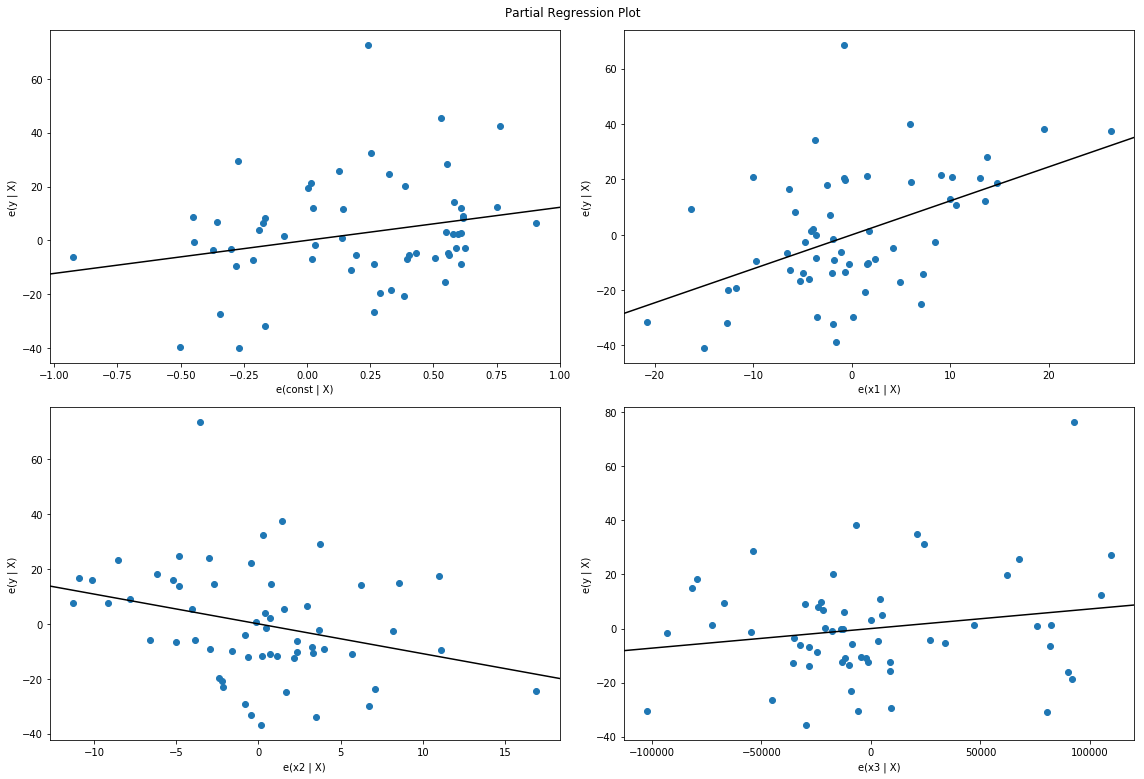

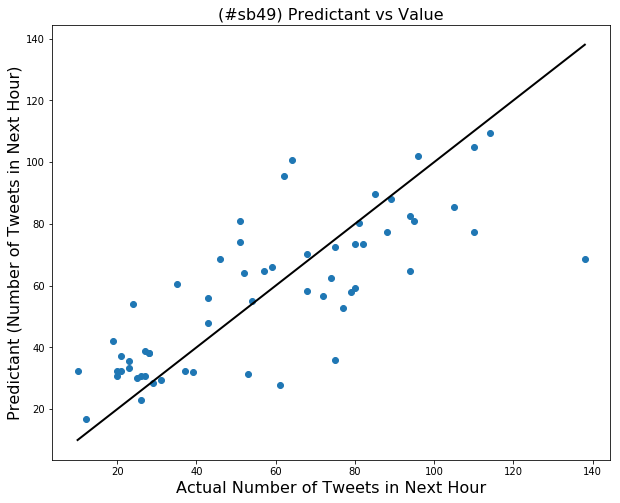

4

In [20]:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Favourites'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

input_arr, input_arr, output_arr, output_arr = train_test_split(input_arr, output_arr, test_size=0.1, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()
print("PREDICTION",output_predicted)
print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)


fig = plt.figure(figsize=(16,11))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
fig.show()
# plot fitted values vs true values
plt.figure(figsize=(10,8))
plt.scatter(output_arr, output_predicted)
plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=2, color='black')
# plt.plot(input_arr,output_predicted, lw=4)
plt.ylabel('Predictant (Number of Tweets in Next Hour)', fontsize = 16)
plt.xlabel('Actual Number of Tweets in Next Hour', fontsize = 16)
plt.title('(#sb49) Predictant vs Value', fontsize = 16)
plt.show()
len(res.pvalues)

In [0]:
# x1            -5.9692      0.679     -8.788      0.000      -7.303      -4.635
# x2            -0.6214      0.069     -8.998      0.000      -0.757      -0.486
# x3           5.25e-06   2.51e-05      0.209      0.835   -4.41e-05    5.46e-05
# x4         -3.624e-05      0.000     -0.309      0.758      -0.000       0.000
# x5          8.659e-05   4.64e-05      1.865      0.063   -4.58e-06       0.000
# x6             1.8496      0.253      7.313      0.000       1.353       2.346
# x7            -0.0038      0.001     -6.034      0.000      -0.005      -0.003
# x8            19.3173      2.130      9.069      0.000      15.134      23.501
# x9             0.0019      0.000      6.082      0.000       0.001       0.003
# x10          -22.1796     32.664     -0.679      0.497     -86.335      41.975